In [105]:
import glob
import csv
import gzip
import itertools
import pandas as pd

### Aggregate dev data (2015, 2016)

In [106]:
da = glob.glob('./dev/*/*/*.human.*')
print('\n'.join(da))

./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.en-ru
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.fi-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.cs-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.de-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.ru-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.tr-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.ru-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.cs-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.de-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.fi-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.ro-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.en-ru


In [107]:
cols = ['human', 'mt-system', 'reference', 'source']
data = { 'src':[], 'trg':[], 'set':[], 'source':[], 'reference':[], 'mt-system':[], 'human':[] }

for rating in da:
    attr = rating.split('.')
    lp = attr[-1]
    test_set = attr[-3]
    print('Processing %s, %s...' % (test_set, lp))
    
    length = len(list(open(rating, 'rt')))
    
    data['src'].extend(length * [lp[:2]])
    data['trg'].extend(length * [lp[3:]])
    data['set'].extend(length * [test_set])
    
    for col in cols:
        attr[-2] = col
        path = '.'.join(attr)
        
        data[col].extend([ i.strip() for i in open(path, 'rt') ])

Processing newstest2015, en-ru...
Processing newstest2015, fi-en...
Processing newstest2015, cs-en...
Processing newstest2015, de-en...
Processing newstest2015, ru-en...
Processing newstest2016, tr-en...
Processing newstest2016, ru-en...
Processing newstest2016, cs-en...
Processing newstest2016, de-en...
Processing newstest2016, fi-en...
Processing newstest2016, ro-en...
Processing newstest2016, en-ru...


In [108]:
dev = pd.DataFrame(data=data)
dev[['human']] = dev[['human']].apply(pd.to_numeric)
dev.head()

,src,trg,set,source,reference,mt-system,human
0,en,ru,newstest2015,"""It's not unexpected, but it is still infuriat...","""Это не обмануло наши ожидания, но все-таки пр...","""Это не неожиданное, но это все еще меня бесиш...",-0.404580
1,en,ru,newstest2015,We're excited to be answering this demand by l...,"Мы рады отреагировать на такой спрос, запустив...",Мы быть для того чтобы отвечать этому требован...,-0.923881
2,en,ru,newstest2015,The winning couple had played the game for twe...,Выигравшая пара играет уже двадцать лет и сооб...,Пара победила на игру за двадцать лет и сказал...,-0.305908
3,en,ru,newstest2015,"Previously, a similar vehicle scrappage progra...",Ранее в России уже действовала подобная програ...,Ранее подобная программа утилизации транспортн...,0.141536
4,en,ru,newstest2015,But now I can play computer games with shootin...,Но теперь я могу играть в компьютерные игры со...,Но теперь я могу играть в компьютерные игры со...,1.149710


### Dev data statistics

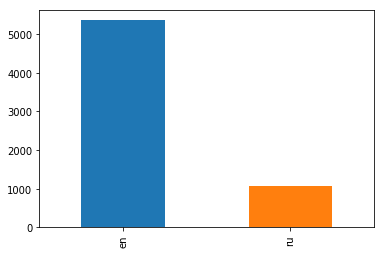

In [109]:
dev['trg'].value_counts().plot(kind='bar')

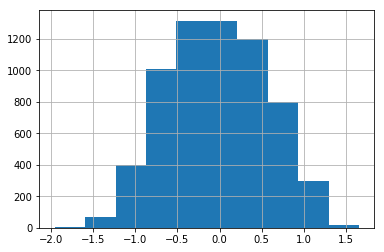

In [110]:
dev['human'].hist()

### Aggregate test data (2017)

#### Segment-level

In [141]:
da_seg = csv.reader(open('./wmt17-metrics-task-package/manual-evaluation/DA-seglevel.csv'), delimiter=' ')
headers = next(da_seg)

da_dict = {}
da_flags = {}
for row in da_seg:
    # need to strip the additional system if outputs equal
    if '+' in row[2]:
        system = row[2][:row[2].index('+')]
    else:
        system = row[2]
    
    basename = '%s.%s.%s' % (row[1], system, row[0])
    line_num = int(row[3])
    da_dict[(basename, line_num)] = row[-1]
    da_flags[(basename, line_num)] = False

In [195]:
baseline_segs = glob.glob('./wmt17-metrics-task-package/final-metric-scores/baselines/*.seg.*')
submissions_segs = glob.glob('./wmt17-metrics-task-package/final-metric-scores/submissions-processed/*/*.seg.*')

scores_dict = dict()

for i in itertools.chain(baseline_segs, submissions_segs):
    metric_name = i.split('/')[-1]
    metric_name = metric_name[:-len('.seg.score.gz')] if metric_name.endswith('.gz') else metric_name[:-len('.seg.score')]
    metric_names.append(metric_name)
    print(metric_name)
    
    if i.endswith('.gz'):
        segs = csv.reader(gzip.open(i, 'rt'), delimiter='\t')
    else:
        segs = csv.reader(open(i, 'rt'), delimiter='\t')
    
    for row in segs:
        lang_pair = row[1]
        set_ = row[2]
        system = row[3]
        line_no = row[4]
        score = row[5]
        
        key = (set_, system, lang_pair, int(line_no))
        scores_dict[key] = scores_dict.get(key, [])
        scores_dict[key].append((metric_name, score))
        
print('Total segment-level submissions: %d' % len(metric_names))
print('\n'.join([ str(i) for i in itertools.islice(scores_dict.items(), None, 3) ]))

sentence-BLEU
TreeAggreg
chrF+
AutoDA-tecto
chrF
AutoDA
BEER
chrF++
Blend
UHH_TSKM
MEANT_2.0-nosrl
MEANT_2.0
bleu2vec_sep
ngram2vec
Total segment-level submissions: 28
(('himltest2017a', 'Chimera', 'en-cs', 1), [('sentence-BLEU', '0.16184'), ('TreeAggreg', '0.486243835616438'), ('chrF+', '42.4488'), ('AutoDA-tecto', '0.674470352405'), ('chrF', '41.4217'), ('AutoDA', '0.709395330927'), ('BEER', '0.509761870499595'), ('chrF++', '39.9412'), ('MEANT_2.0-nosrl', '0.591544')])
(('himltest2017a', 'Chimera', 'en-cs', 2), [('sentence-BLEU', '0.127981'), ('TreeAggreg', '0.285166176470588'), ('chrF+', '22.3921'), ('AutoDA-tecto', '0.504249320516'), ('chrF', '22.0257'), ('AutoDA', '0.582819833686'), ('BEER', '0.332332548944867'), ('chrF++', '20.7092'), ('MEANT_2.0-nosrl', '0.454879')])
(('himltest2017a', 'Chimera', 'en-cs', 3), [('sentence-BLEU', '0.34132'), ('TreeAggreg', '0.489682089552239'), ('chrF+', '49.3734'), ('AutoDA-tecto', '0.717957525771'), ('chrF', '48.8959'), ('AutoDA', '0.7330952001'

In [196]:
cols = ['human', 'mt-system', 'reference', 'source']
data = { 'src':[], 'trg':[], 'set':[], 'system':[], 'source':[], 'reference':[], 'mt-system':[], 'human':[] }

# add metric columns
for metric_name in metric_names:
    data['metric:%s' % metric_name] = []

trials = glob.glob('./wmt17-metrics-task-package/input/tokenized/system-outputs/*/*/*')
for trial in trials:
    attr = trial.split('/')
    lp = attr[6].replace('-', '')
    refname = '%s-%s-ref.%s' % (attr[5], lp, lp[2:])
    srcname = '%s-%s-src.%s' % (attr[5], lp, lp[:2])
    
    basename = attr[-1]
    print('Processing %s...' % basename)
    try:
        source = list(open('./wmt17-metrics-task-package/input/raw/wmt17-submitted-data/txt/sources/%s' % srcname))
    except:
        source = list(open('./wmt17-metrics-task-package/input/raw/himltest17/txt/sources/%s' % srcname))
    reference = list(open('./wmt17-metrics-task-package/input/tokenized/references/%s' % refname))
    system_output = open(trial)
    
    for i, (src, ref, out) in enumerate(zip(source, reference, system_output), 1):
        if (basename, i) in da_dict:
            human = da_dict[(basename, i)]
            da_flags[(basename, i)] = True
            src, ref, out = src.strip(), ref.strip(), out.strip()
            
            data['src'].append(lp[:2])
            data['trg'].append(lp[2:])
            data['set'].append(attr[5])
            data['system'].append(basename.split('.')[1])
            data['source'].append(src)
            data['reference'].append(ref)
            data['mt-system'].append(out)
            data['human'].append(human)
            
            # add metric scores
            # there are periods in system names wtf
            key = (attr[5], attr[-1][len(attr[5]+'.'):][:-len('.'+attr[6])], attr[6], i)
            metric_col = { metric_name : None for metric_name in metric_names }
            
            if key in scores_dict:
                for metric, score in scores_dict[key]:
                    metric_col[metric] = score

            for metric, score in metric_col.items():
                data['metric:%s' % metric].append(score)

Processing himltest2017b.PBMT.en-ro...
Processing himltest2017b.Combo.en-ro...
Processing himltest2017a.Chimera.en-cs...
Processing himltest2017a.NMT.en-cs...
Processing himltest2017a.Tecto.en-cs...
Processing himltest2017a.Year1.en-pl...
Processing himltest2017a.PBMT.en-pl...
Processing himltest2017a.NMT.en-pl...
Processing himltest2017a.Combo.en-ro...
Processing himltest2017a.NMT.en-ro...
Processing himltest2017a.PBMT.en-ro...
Processing himltest2017a.Syntax.en-de...
Processing himltest2017a.PBMT.en-de...
Processing himltest2017a.NMT.en-de...
Processing newstest2017.tuning-task-denisov_4gb.sgm.0.en-cs...
Processing newstest2017.tuning-task-afrl_8gb.sgm.0.en-cs...
Processing newstest2017.tuning-task-ufal_4gb.sgm.0.en-cs...
Processing newstest2017.online-B.0.en-cs...
Processing newstest2017.LIUM-NMT.4947.en-cs...
Processing newstest2017.tuning-task-afrl_4gb.sgm.0.en-cs...
Processing newstest2017.CU-Chimera.4886.en-cs...
Processing newstest2017.LIUM-FNMT.4852.en-cs...
Processing newstes

('newstest2017', 'NRC.4855', 'ru-en', 1563)
('newstest2017', 'NRC.4855', 'ru-en', 1578)
('newstest2017', 'NRC.4855', 'ru-en', 1603)
('newstest2017', 'NRC.4855', 'ru-en', 1656)
('newstest2017', 'NRC.4855', 'ru-en', 1730)
('newstest2017', 'NRC.4855', 'ru-en', 1736)
('newstest2017', 'NRC.4855', 'ru-en', 1772)
('newstest2017', 'NRC.4855', 'ru-en', 1808)
('newstest2017', 'NRC.4855', 'ru-en', 1944)
('newstest2017', 'NRC.4855', 'ru-en', 1956)
('newstest2017', 'NRC.4855', 'ru-en', 1981)
('newstest2017', 'NRC.4855', 'ru-en', 1997)
('newstest2017', 'NRC.4855', 'ru-en', 2000)
('newstest2017', 'NRC.4855', 'ru-en', 2053)
('newstest2017', 'NRC.4855', 'ru-en', 2107)
('newstest2017', 'NRC.4855', 'ru-en', 2145)
('newstest2017', 'NRC.4855', 'ru-en', 2150)
('newstest2017', 'NRC.4855', 'ru-en', 2219)
('newstest2017', 'NRC.4855', 'ru-en', 2269)
('newstest2017', 'NRC.4855', 'ru-en', 2325)
('newstest2017', 'NRC.4855', 'ru-en', 2327)
('newstest2017', 'NRC.4855', 'ru-en', 2328)
('newstest2017', 'NRC.4855', 'ru

('newstest2017', 'jhu-pbmt.4972', 'tr-en', 774)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 786)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 831)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 833)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 854)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 893)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 972)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 979)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 981)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1137)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1174)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1216)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1227)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1243)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1322)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1388)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1499)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1517)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1537)
('newstest2017', 'jhu-pbmt.4972', 'tr-en', 1660)
('newstest2017', 'jhu-pbmt.49

('newstest2017', 'UU-HNMT.5162', 'zh-en', 9)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 101)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 109)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 157)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 283)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 362)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 496)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 502)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 627)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 775)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 843)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 924)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 981)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1354)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1375)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1416)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1421)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1460)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1556)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1632)
('newstest2017', 'UU-HNMT.5162', 'zh-en', 1634)
('newst

('newstest2017', 'online-A.0', 'fi-en', 1300)
('newstest2017', 'online-A.0', 'fi-en', 1318)
('newstest2017', 'online-A.0', 'fi-en', 1413)
('newstest2017', 'online-A.0', 'fi-en', 1450)
('newstest2017', 'online-A.0', 'fi-en', 1510)
('newstest2017', 'online-A.0', 'fi-en', 1519)
('newstest2017', 'online-A.0', 'fi-en', 1553)
('newstest2017', 'online-A.0', 'fi-en', 1555)
('newstest2017', 'online-A.0', 'fi-en', 1636)
('newstest2017', 'online-A.0', 'fi-en', 1639)
('newstest2017', 'online-A.0', 'fi-en', 1657)
('newstest2017', 'online-A.0', 'fi-en', 1752)
('newstest2017', 'online-A.0', 'fi-en', 1802)
('newstest2017', 'online-A.0', 'fi-en', 1857)
('newstest2017', 'online-A.0', 'fi-en', 1865)
('newstest2017', 'online-A.0', 'fi-en', 1919)
('newstest2017', 'online-A.0', 'fi-en', 1936)
('newstest2017', 'online-A.0', 'fi-en', 1965)
('newstest2017', 'online-A.0', 'fi-en', 1996)
('newstest2017', 'online-A.0', 'fi-en', 1998)
('newstest2017', 'online-A.0', 'fi-en', 2041)
('newstest2017', 'online-A.0', 'fi

('newstest2017', 'PJATK.4740', 'lv-en', 29)
('newstest2017', 'PJATK.4740', 'lv-en', 43)
('newstest2017', 'PJATK.4740', 'lv-en', 101)
('newstest2017', 'PJATK.4740', 'lv-en', 145)
('newstest2017', 'PJATK.4740', 'lv-en', 148)
('newstest2017', 'PJATK.4740', 'lv-en', 199)
('newstest2017', 'PJATK.4740', 'lv-en', 228)
('newstest2017', 'PJATK.4740', 'lv-en', 299)
('newstest2017', 'PJATK.4740', 'lv-en', 327)
('newstest2017', 'PJATK.4740', 'lv-en', 335)
('newstest2017', 'PJATK.4740', 'lv-en', 363)
('newstest2017', 'PJATK.4740', 'lv-en', 374)
('newstest2017', 'PJATK.4740', 'lv-en', 387)
('newstest2017', 'PJATK.4740', 'lv-en', 413)
('newstest2017', 'PJATK.4740', 'lv-en', 489)
('newstest2017', 'PJATK.4740', 'lv-en', 521)
('newstest2017', 'PJATK.4740', 'lv-en', 538)
('newstest2017', 'PJATK.4740', 'lv-en', 667)
('newstest2017', 'PJATK.4740', 'lv-en', 688)
('newstest2017', 'PJATK.4740', 'lv-en', 693)
('newstest2017', 'PJATK.4740', 'lv-en', 714)
('newstest2017', 'PJATK.4740', 'lv-en', 719)
('newstest20

('newstest2017', 'online-B.0', 'lv-en', 768)
('newstest2017', 'online-B.0', 'lv-en', 794)
('newstest2017', 'online-B.0', 'lv-en', 799)
('newstest2017', 'online-B.0', 'lv-en', 821)
('newstest2017', 'online-B.0', 'lv-en', 833)
('newstest2017', 'online-B.0', 'lv-en', 857)
('newstest2017', 'online-B.0', 'lv-en', 883)
('newstest2017', 'online-B.0', 'lv-en', 905)
('newstest2017', 'online-B.0', 'lv-en', 927)
('newstest2017', 'online-B.0', 'lv-en', 945)
('newstest2017', 'online-B.0', 'lv-en', 956)
('newstest2017', 'online-B.0', 'lv-en', 958)
('newstest2017', 'online-B.0', 'lv-en', 981)
('newstest2017', 'online-B.0', 'lv-en', 983)
('newstest2017', 'online-B.0', 'lv-en', 984)
('newstest2017', 'online-B.0', 'lv-en', 1019)
('newstest2017', 'online-B.0', 'lv-en', 1020)
('newstest2017', 'online-B.0', 'lv-en', 1042)
('newstest2017', 'online-B.0', 'lv-en', 1055)
('newstest2017', 'online-B.0', 'lv-en', 1056)
('newstest2017', 'online-B.0', 'lv-en', 1084)
('newstest2017', 'online-B.0', 'lv-en', 1106)
('n

('newstest2017', 'uedin-nmt.4955', 'cs-en', 2853)
('newstest2017', 'uedin-nmt.4955', 'cs-en', 2879)
('newstest2017', 'uedin-nmt.4955', 'cs-en', 2882)
('newstest2017', 'uedin-nmt.4955', 'cs-en', 2887)
Processing newstest2017.online-B.0.cs-en...
('newstest2017', 'online-B.0', 'cs-en', 3)
('newstest2017', 'online-B.0', 'cs-en', 14)
('newstest2017', 'online-B.0', 'cs-en', 36)
('newstest2017', 'online-B.0', 'cs-en', 61)
('newstest2017', 'online-B.0', 'cs-en', 119)
('newstest2017', 'online-B.0', 'cs-en', 162)
('newstest2017', 'online-B.0', 'cs-en', 168)
('newstest2017', 'online-B.0', 'cs-en', 178)
('newstest2017', 'online-B.0', 'cs-en', 207)
('newstest2017', 'online-B.0', 'cs-en', 219)
('newstest2017', 'online-B.0', 'cs-en', 270)
('newstest2017', 'online-B.0', 'cs-en', 315)
('newstest2017', 'online-B.0', 'cs-en', 347)
('newstest2017', 'online-B.0', 'cs-en', 379)
('newstest2017', 'online-B.0', 'cs-en', 405)
('newstest2017', 'online-B.0', 'cs-en', 430)
('newstest2017', 'online-B.0', 'cs-en', 4

('newstest2017', 'C-3MA.4958', 'de-en', 7)
('newstest2017', 'C-3MA.4958', 'de-en', 82)
('newstest2017', 'C-3MA.4958', 'de-en', 169)
('newstest2017', 'C-3MA.4958', 'de-en', 193)
('newstest2017', 'C-3MA.4958', 'de-en', 262)
('newstest2017', 'C-3MA.4958', 'de-en', 386)
('newstest2017', 'C-3MA.4958', 'de-en', 532)
('newstest2017', 'C-3MA.4958', 'de-en', 554)
('newstest2017', 'C-3MA.4958', 'de-en', 741)
('newstest2017', 'C-3MA.4958', 'de-en', 753)
('newstest2017', 'C-3MA.4958', 'de-en', 859)
('newstest2017', 'C-3MA.4958', 'de-en', 868)
('newstest2017', 'C-3MA.4958', 'de-en', 875)
('newstest2017', 'C-3MA.4958', 'de-en', 948)
('newstest2017', 'C-3MA.4958', 'de-en', 1054)
('newstest2017', 'C-3MA.4958', 'de-en', 1057)
('newstest2017', 'C-3MA.4958', 'de-en', 1062)
('newstest2017', 'C-3MA.4958', 'de-en', 1133)
('newstest2017', 'C-3MA.4958', 'de-en', 1157)
('newstest2017', 'C-3MA.4958', 'de-en', 1179)
('newstest2017', 'C-3MA.4958', 'de-en', 1200)
('newstest2017', 'C-3MA.4958', 'de-en', 1220)
('new

('newstest2017', 'uedin-nmt.5111', 'en-zh', 29)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 86)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 148)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 193)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 233)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 257)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 287)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 314)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 348)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 399)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 443)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 470)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 471)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 473)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 524)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 702)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 744)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 745)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 799)
('newstest2017', 'uedin-nmt.5111', 'en-zh', 849)
('newstest2017', 'uedi

Processing newstest2017.LIUM-NMT.4953.en-tr...
Processing newstest2017.online-A.0.en-tr...
Processing newstest2017.online-G.0.en-tr...
Processing newstest2017.online-B.0.en-tr...
Processing newstest2017.jhu-pbmt.4970.en-tr...
Processing newstest2017.online-G.0.en-de...
Processing newstest2017.xmu.4910.en-de...
Processing newstest2017.RWTH-nmt-ensemble.4921.en-de...
Processing newstest2017.PROMT-Rule-based.4735.en-de...
Processing newstest2017.TALP-UPC.4834.en-de...
Processing newstest2017.SYSTRAN.4847.en-de...
Processing newstest2017.LMU-nmt-reranked.4934.en-de...
Processing newstest2017.online-F.0.en-de...
Processing newstest2017.online-B.0.en-de...
Processing newstest2017.KIT.4950.en-de...
Processing newstest2017.uedin-nmt.4722.en-de...
Processing newstest2017.C-3MA.4959.en-de...
Processing newstest2017.LMU-nmt-single.4893.en-de...
Processing newstest2017.online-A.0.en-de...
Processing newstest2017.fbk-nmt-combination.4870.en-de...
Processing newstest2017.LIUM-NMT.4900.en-de...
Proce

('newstest2017', 'online-B.0', 'en-ru', 114)
('newstest2017', 'online-B.0', 'en-ru', 127)
('newstest2017', 'online-B.0', 'en-ru', 227)
('newstest2017', 'online-B.0', 'en-ru', 229)
('newstest2017', 'online-B.0', 'en-ru', 236)
('newstest2017', 'online-B.0', 'en-ru', 309)
('newstest2017', 'online-B.0', 'en-ru', 432)
('newstest2017', 'online-B.0', 'en-ru', 451)
('newstest2017', 'online-B.0', 'en-ru', 486)
('newstest2017', 'online-B.0', 'en-ru', 555)
('newstest2017', 'online-B.0', 'en-ru', 617)
('newstest2017', 'online-B.0', 'en-ru', 679)
('newstest2017', 'online-B.0', 'en-ru', 740)
('newstest2017', 'online-B.0', 'en-ru', 910)
('newstest2017', 'online-B.0', 'en-ru', 978)
('newstest2017', 'online-B.0', 'en-ru', 986)
('newstest2017', 'online-B.0', 'en-ru', 1031)
('newstest2017', 'online-B.0', 'en-ru', 1124)
('newstest2017', 'online-B.0', 'en-ru', 1181)
('newstest2017', 'online-B.0', 'en-ru', 1182)
('newstest2017', 'online-B.0', 'en-ru', 1210)
('newstest2017', 'online-B.0', 'en-ru', 1215)
('ne

#### System-level

### Test data (2017) statistics

In [206]:
test = pd.DataFrame(data=data)
test[['human']] = test[['human']].apply(pd.to_numeric)
for metric_name in metric_names:
    metric_str = 'metric:%s' % metric_name
    test[[metric_str]] = test[[metric_str]].apply(pd.to_numeric)
test.head()

,src,trg,set,system,source,reference,mt-system,human,metric:sentence-BLEU,metric:TreeAggreg,...,metric:AutoDA,metric:BEER,metric:chrF++,metric:Blend,metric:UHH_TSKM,metric:MEANT_2,metric:bleu2vec_sep,metric:ngram2vec,metric:MEANT_2.0-nosrl,metric:MEANT_2.0
0,ru,en,newstest2017,online-G,В условиях санатория человек может проверить с...,"in the setting of a health resort , a person c...",in the conditions of sanatorium employees can ...,-0.612352,0.132178,0.413901,...,-0.242156,0.532507,38.8754,-0.022669,0.521158,NaN,0.266811,0.204185,0.654131,0.629299
1,ru,en,newstest2017,online-G,"Так что не стоит бояться погоды за окном, тем ...","so , there &apos;s no need to fear the weather...","so do not be afraid of the weather outside , e...",0.651127,0.522612,0.754777,...,0.412452,0.702299,69.9555,0.238482,0.584938,NaN,0.605400,0.566747,0.808935,0.774171
2,ru,en,newstest2017,online-G,"В июне показатель вырос на 1,7%.","in june , this figure rose by 1.7 % .",in june the indicator grew by 1.7 % .,0.540414,0.404289,0.437474,...,-0.184209,0.468754,40.0444,0.226740,0.493989,NaN,0.482115,0.442945,0.768920,0.743699
3,ru,en,newstest2017,online-G,"До этого она, кстати, успела выиграть серебро ...","prior to this , in fact , she managed to win s...","prior to that , she managed to win silver at t...",0.739021,0.510558,0.761227,...,0.324358,0.697759,66.0822,0.380886,0.725744,NaN,0.510809,0.487644,0.867085,0.864641
4,ru,en,newstest2017,online-G,"Эмигрировав в США, она быстро вошла в юношеску...","having immigrated to the united states , she q...","emigrated to the us , she quickly entered in t...",-0.345920,0.337584,0.618103,...,-0.103353,0.569943,51.6337,-0.190116,0.471799,NaN,0.449939,0.408342,0.691634,0.669250


In [207]:
test['src-trg'] = test['src'] + '-' + test['trg']
test.groupby('src-trg').count()

,src,trg,set,system,source,reference,mt-system,human,metric:sentence-BLEU,metric:TreeAggreg,...,metric:AutoDA,metric:BEER,metric:chrF++,metric:Blend,metric:UHH_TSKM,metric:MEANT_2,metric:bleu2vec_sep,metric:ngram2vec,metric:MEANT_2.0-nosrl,metric:MEANT_2.0
src-trg,,,,,,,,,,,,,,,,,,,,,
cs-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
de-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
en-ru,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,0,0,560,0,560,0
en-zh,560,560,560,560,560,560,560,560,560,560,...,560,560,560,0,0,0,0,0,560,560
fi-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
lv-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
ru-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
tr-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560
zh-en,560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,0,560,560,560,560


In [210]:
test[test.trg == 'en'].groupby('src').corr()

human  metric:AutoDA  metric:AutoDA-tecto  \
src                                                                        
cs  human                   1.000000       0.498674                  NaN   
    metric:AutoDA           0.498674       1.000000                  NaN   
    metric:AutoDA-tecto          NaN            NaN                  NaN   
    metric:BEER             0.510591       0.909356                  NaN   
    metric:Blend            0.594295       0.853702                  NaN   
    metric:MEANT_2               NaN            NaN                  NaN   
    metric:MEANT_2.0        0.577652       0.792608                  NaN   
    metric:MEANT_2.0-nosrl  0.565957       0.798418                  NaN   
    metric:TreeAggreg       0.486036       0.862012                  NaN   
    metric:UHH_TSKM         0.506737       0.829289                  NaN   
    metric:bleu2vec_sep     0.438846       0.783129                  NaN   
    metric:chrF             0.514376       0.936279                  NaN   
    metric:chrF+                 NaN            NaN                  NaN   
    metric:chrF++           0.522927       0.938356                  NaN   
    metric:ngram2vec        0.435822       0.799976                  NaN   
    metric:sentence-BLEU    0.434955       0.783057                  NaN   
de  human                   1.000000       0.543179                  NaN   
    metric:AutoDA           0.543179       1.000000                  NaN   
    metric:AutoDA-tecto          NaN            NaN                  NaN   
    metric:BEER             0.530430       0.942295                  NaN   
    metric:Blend            0.571033       0.852052                  NaN   
    metric:MEANT_2               NaN            NaN                  NaN   
    metric:MEANT_2.0        0.564808       0.848093                  NaN   
    metric:MEANT_2.0-nosrl  0.563824       0.855229                  NaN   
    metric:TreeAggreg       0.526031       0.884284                  NaN   
    metric:UHH_TSKM         0.478784       0.855189                  NaN   
    metric:bleu2vec_sep     0.429206       0.804492                  NaN   
    metric:chrF             0.530526       0.965008                  NaN   
    metric:chrF+                 NaN            NaN                  NaN   
    metric:chrF++           0.533547       0.968540                  NaN   
...                              ...            ...                  ...   
tr  metric:AutoDA-tecto          NaN            NaN                  NaN   
    metric:BEER             0.599581       0.942781                  NaN   
    metric:Blend            0.671408       0.852540                  NaN   
    metric:MEANT_2               NaN            NaN                  NaN   
    metric:MEANT_2.0        0.595724       0.870085                  NaN   
    metric:MEANT_2.0-nosrl  0.581914       0.872236                  NaN   
    metric:TreeAggreg       0.571230       0.901945                  NaN   
    metric:UHH_TSKM         0.477601       0.695911                  NaN   
    metric:bleu2vec_sep     0.529093       0.805896                  NaN   
    metric:chrF             0.607018       0.958058                  NaN   
    metric:chrF+                 NaN            NaN                  NaN   
    metric:chrF++           0.613657       0.962761                  NaN   
    metric:ngram2vec        0.538488       0.816593                  NaN   
    metric:sentence-BLEU    0.538433       0.723338                  NaN   
zh  human                   1.000000       0.583051                  NaN   
    metric:AutoDA           0.583051       1.000000                  NaN   
    metric:AutoDA-tecto          NaN            NaN                  NaN   
    metric:BEER             0.582427       0.926943                  NaN   
    metric:Blend            0.660613       0.857453                  NaN   
    metric:MEANT_2               NaN            NaN                  NaN   
   

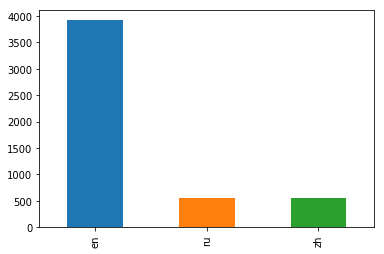

In [181]:
test['trg'].value_counts().plot(kind='bar')

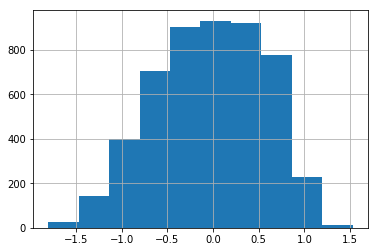

In [37]:
test['human'].hist()

In [69]:
dev_en = dev[dev.trg == 'en']
print('Dev, trg-en')
print(dev_en['src'].value_counts())
print(len(dev_en))

test_en = test[test.trg == 'en']
print('Test, trg-en')
print(test_en['src'].value_counts())
print(len(test_en))

Dev, trg-en
ru    1060
fi    1060
cs    1060
de    1060
ro     560
tr     560
Name: src, dtype: int64
5360
Test, trg-en
ru    560
cs    560
fi    560
de    560
lv    560
tr    560
zh    560
Name: src, dtype: int64
3920


### Save data

In [56]:
trg_en = pd.concat([dev_en, test_en])
for column in trg_en:
    print('Writing column: %s' % column)
    handle = open('./data/trg-en/%s' % column, 'wt')
    
    li = trg_en[column].apply(lambda x: str(x)).tolist()
    handle.write('\n'.join(li))
    handle.close()

Writing column: src
Writing column: trg
Writing column: set
Writing column: source
Writing column: reference
Writing column: mt-system
Writing column: human
